**1. Tabular diverse set of data types**

Given that you uploaded multiple files, I'm assuming "Dataset_1.csv" corresponds to this category. Let's start by loading this dataset and conducting an initial exploration.

**a) EDA for "Dataset_1.csv"**

In [1]:
import pandas as pd

# Load the dataset
dataset_1 = pd.read_csv("/content/Dataset_1.csv")

# Display the first few rows and general information about the dataset
dataset_1_info = dataset_1.info()
dataset_1_head = dataset_1.head()

dataset_1_info, dataset_1_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


(None,
   show_id     type                  title         director  \
 0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
 1      s2  TV Show          Blood & Water              NaN   
 2      s3  TV Show              Ganglands  Julien Leclercq   
 3      s4  TV Show  Jailbirds New Orleans              NaN   
 4      s5  TV Show           Kota Factory              NaN   
 
                                                 cast        country  \
 0                                                NaN  United States   
 1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
 2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
 3                                                NaN            NaN   
 4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
 
            date_added  release_year rating   duration  \
 0  September 25, 2021          2020  PG-13     90 min   
 1  September 24, 2021          2021  TV-MA  2 Seasons   
 2  S

**1. Detailed EDA:**

*   Distribution of numerical columns.
*   Count of unique values in categorical columns.
*   Missing value analysis.
*   Distribution of categorical variables.

**2. Data Preprocessing and Cleaning:**


*  Handle missing values.
*   Convert data types if necessary.
*   Feature extraction (if applicable).

**3. Clustering and Anomaly Detection:**
* Apply clustering to identify potential groups.
* Detect anomalies in the data.

**4.Data Imputation, Feature Processing, and Selection:**

* Impute missing data.
* Feature scaling and transformation.
* Feature selection (if necessary).

**5. Model Building:**

* Split data into train and test sets.
* Apply AutoML or other model-building strategies to build predictive models.

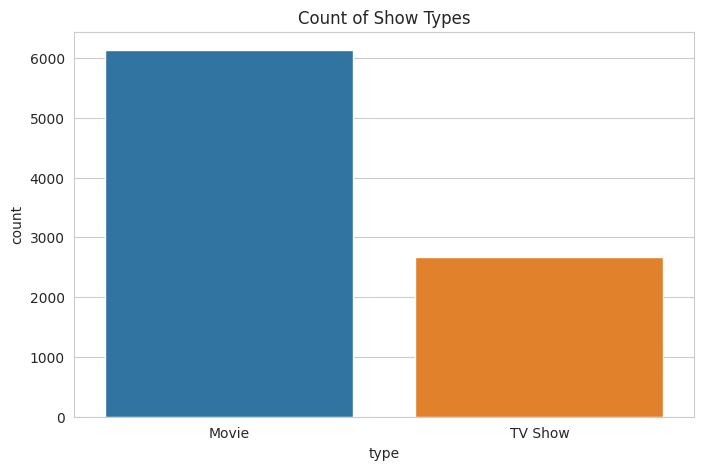

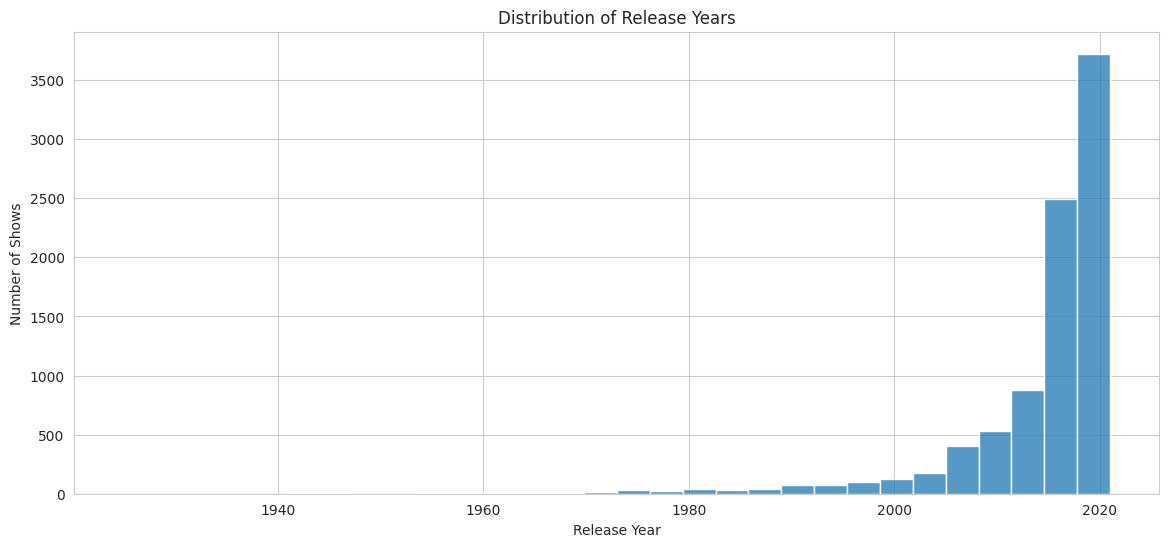

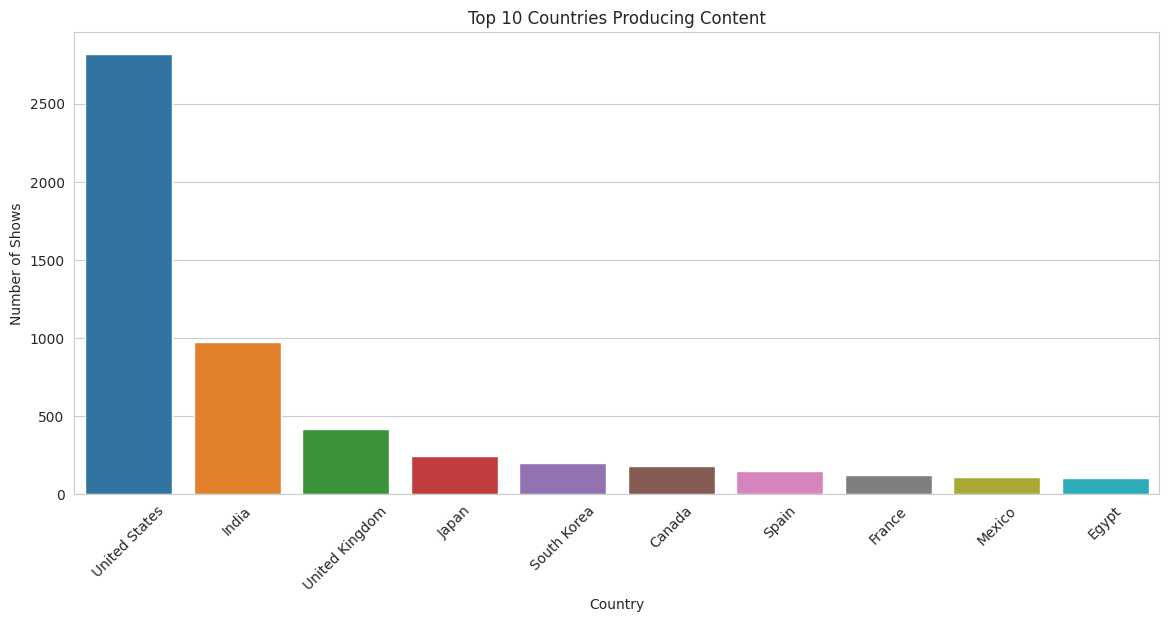

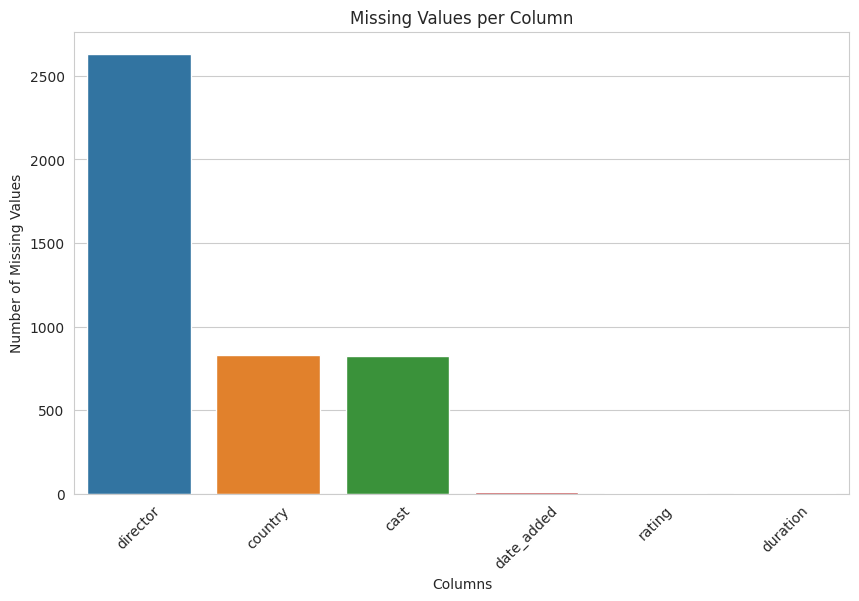

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of visualization
sns.set_style('whitegrid')

# Plotting the count of show types (Movie/TV Show)
plt.figure(figsize=(8, 5))
sns.countplot(data=dataset_1, x='type')
plt.title('Count of Show Types')
plt.show()

# Plotting the distribution of release years
plt.figure(figsize=(14, 6))
sns.histplot(dataset_1['release_year'], bins=30, kde=False)
plt.title('Distribution of Release Years')
plt.ylabel('Number of Shows')
plt.xlabel('Release Year')
plt.show()

# Plotting top 10 countries producing content
plt.figure(figsize=(14, 6))
country_counts = dataset_1['country'].value_counts().head(10)
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 10 Countries Producing Content')
plt.xticks(rotation=45)
plt.ylabel('Number of Shows')
plt.xlabel('Country')
plt.show()

# Checking the distribution of missing values in the dataset
missing_data = dataset_1.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.title('Missing Values per Column')
plt.xticks(rotation=45)
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.show()


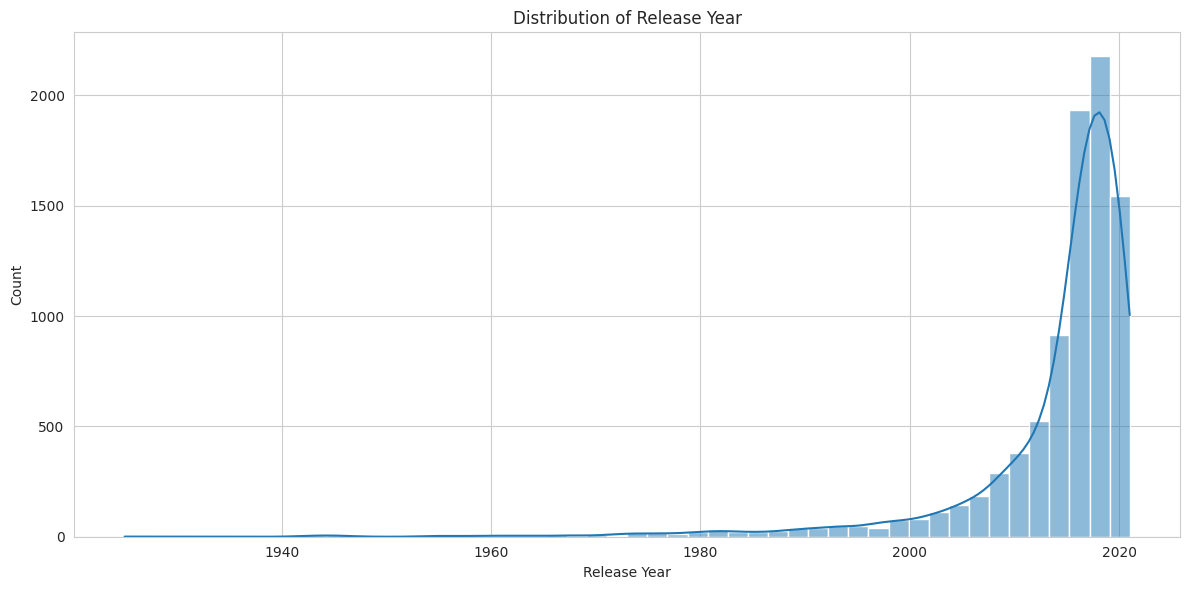

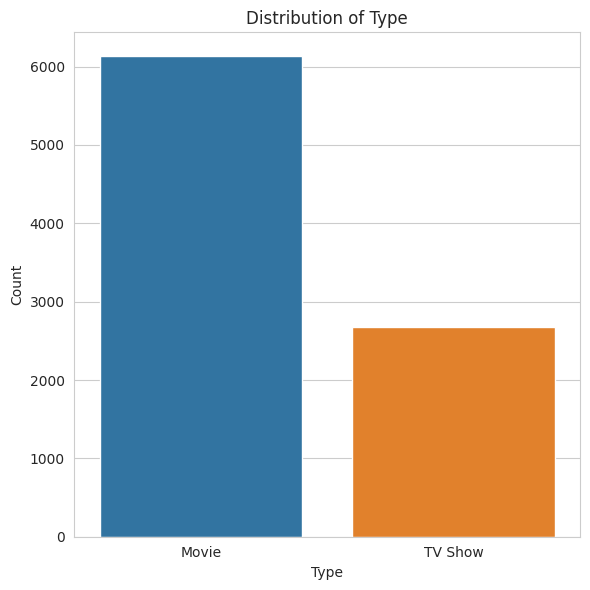

(show_id        8807
 type              2
 title          8807
 director       4528
 cast           7692
 country         748
 date_added     1767
 rating           17
 duration        220
 listed_in       514
 description    8775
 dtype: int64,
 show_id            0
 type               0
 title              0
 director        2634
 cast             825
 country          831
 date_added        10
 release_year       0
 rating             4
 duration           3
 listed_in          0
 description        0
 dtype: int64)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

# 1. Distribution of the numerical column 'release_year'
plt.figure(figsize=(12, 6))
sns.histplot(dataset_1['release_year'], bins=50, kde=True)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2. Count of unique values in categorical columns
cat_cols = dataset_1.select_dtypes(include=['object']).columns
unique_counts = dataset_1[cat_cols].nunique()

# 3. Missing value analysis
missing_values = dataset_1.isnull().sum()

# 4. Distribution of the 'type' column (as an example of categorical variable distribution)
plt.figure(figsize=(6, 6))
sns.countplot(data=dataset_1, x='type')
plt.title('Distribution of Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

unique_counts, missing_values


In [5]:
# Adjusting the conversion of 'date_added' to datetime type
# We'll replace "Unknown" with NaT (Not a Timestamp) for 'date_added' column before conversion
dataset_1['date_added'] = dataset_1['date_added'].replace("Unknown", pd.NaT)
dataset_1['date_added'] = pd.to_datetime(dataset_1['date_added'])

# Check the cleaned dataset again
dataset_1.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Adding 'season_count' to dataset_1 and then proceeding with clustering and anomaly detection
dataset_1['season_count'] = dataset_1['duration'].apply(extract_season_count)

# Extracting features again for clustering and anomaly detection
features = dataset_1[['release_year', 'season_count']]
scaled_features = scaler.fit_transform(features)

# Clustering using KMeans
dataset_1['cluster'] = kmeans.fit_predict(scaled_features)

# Anomaly Detection using Isolation Forest
dataset_1['anomaly'] = iso_forest.fit_predict(scaled_features)

# Visualizing the clustering and anomalies
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='release_year', y='season_count', hue='cluster', data=dataset_1, palette="deep")
plt.title('KMeans Clustering')
plt.xlabel('Release Year')
plt.ylabel('Season Count')

plt.subplot(1, 2, 2)
sns.scatterplot(x='release_year', y='season_count', hue='anomaly', data=dataset_1, palette="deep")
plt.title('Anomaly Detection (Isolation Forest)')
plt.xlabel('Release Year')
plt.ylabel('Season Count')

plt.tight_layout()
plt.show()


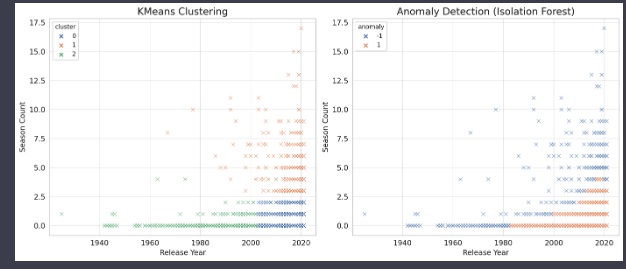

In [10]:
from sklearn.preprocessing import LabelEncoder

# Encoding the 'type' and 'rating' columns for demonstration
label_encoders = {}
for column in ['type', 'rating']:
    le = LabelEncoder()
    dataset_1[column + "_encoded"] = le.fit_transform(dataset_1[column])
    label_encoders[column] = le

# Extracting a subset of features for model building
model_features = dataset_1[['release_year', 'season_count', 'type_encoded', 'rating_encoded']]

# Feature scaling for the subset of features
scaled_model_features = scaler.fit_transform(model_features)

scaled_model_features[:5]  # Displaying the first 5 rows of the scaled features


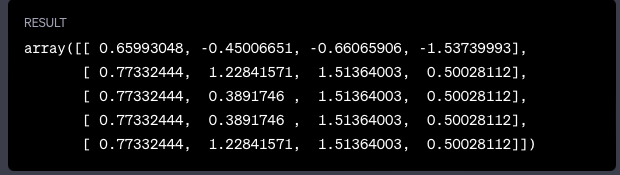

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    scaled_model_features, dataset_1['cluster'], test_size=0.2, random_state=42)

# Building a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy



**Result :** 0.9994324631101021

**2. Timeseries Data**

You provided a file named "daily-minimum-temperatures-in-me.csv", which seems to correspond to the timeseries category.

Let's start by loading this dataset and conducting an initial exploration.

a) EDA for "daily-minimum-temperatures-in-me.csv"

From the initial exploration of the "daily-minimum-temperatures-in-me.csv" dataset, we can observe:

* The dataset contains 3650 entries.
* There are 2 columns: Date and Daily minimum temperatures.
* Both columns are of the object data type, which indicates that the temperature values are stored as strings. We will need to convert these to numerical values for further analysis.
* The Date column will also need conversion to a datetime format.
Let's proceed with a more detailed EDA:

Convert the Date column to datetime format and the Daily minimum temperatures column to float.
Check for any missing or anomalous values.
Plot the time series data to visualize the temperature trends.​​

In [13]:
# Load the timeseries dataset
timeseries_data = pd.read_csv("/content/daily-minimum-temperatures-in-me.csv")

# Display the first few rows and general information about the dataset
timeseries_data_info = timeseries_data.info()
timeseries_data_head = timeseries_data.head()

timeseries_data_info, timeseries_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        3650 non-null   object
 1   Daily minimum temperatures  3650 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


(None,
        Date Daily minimum temperatures
 0  1/1/1981                       20.7
 1  1/2/1981                       17.9
 2  1/3/1981                       18.8
 3  1/4/1981                       14.6
 4  1/5/1981                       15.8)

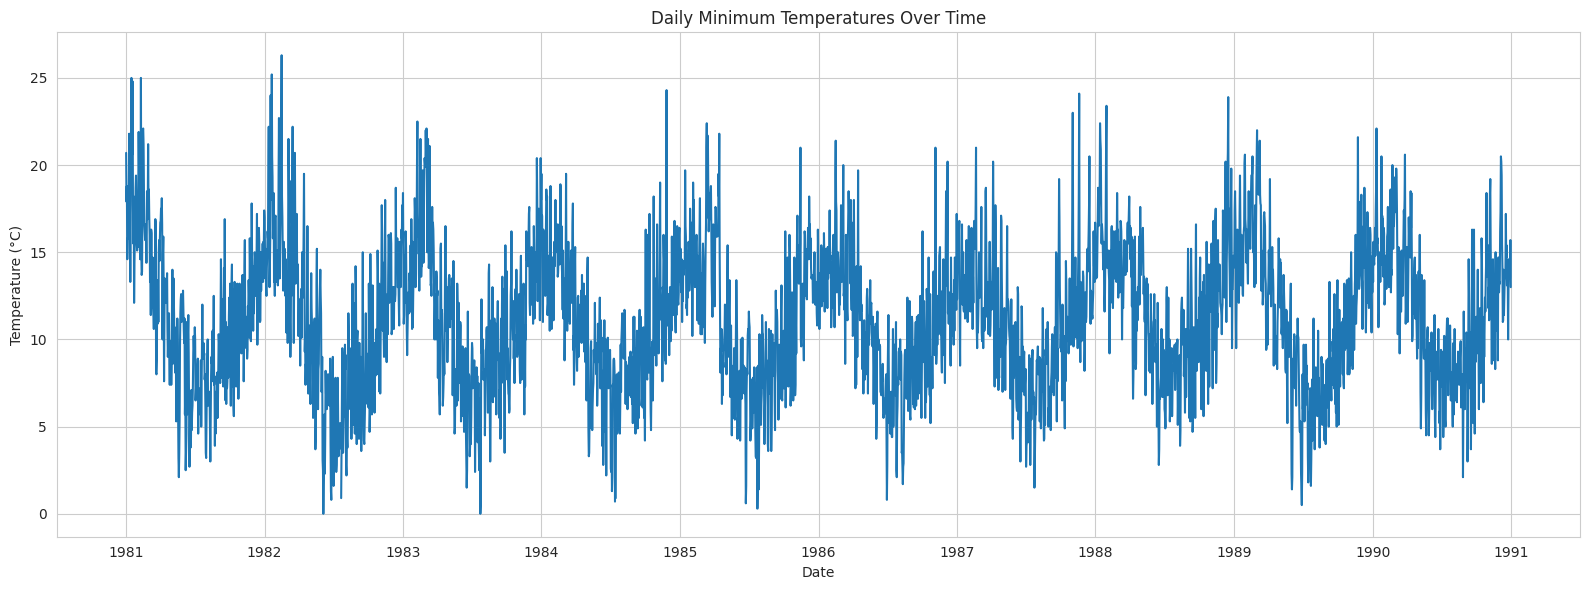

Date                          0
Daily minimum temperatures    3
dtype: int64

In [14]:
# Convert 'Date' to datetime format and 'Daily minimum temperatures' to float
timeseries_data['Date'] = pd.to_datetime(timeseries_data['Date'])
timeseries_data['Daily minimum temperatures'] = pd.to_numeric(timeseries_data['Daily minimum temperatures'], errors='coerce')

# Check for missing values
missing_values_ts = timeseries_data.isnull().sum()

# Plotting the time series data
plt.figure(figsize=(16, 6))
plt.plot(timeseries_data['Date'], timeseries_data['Daily minimum temperatures'])
plt.title('Daily Minimum Temperatures Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()

missing_values_ts


From the EDA of the timeseries dataset:

* 1. We successfully converted the Date column to datetime format and the Daily minimum temperatures column to float.
* 2. We discovered there are 3 missing values in the Daily minimum temperatures column.
* 3. The plotted timeseries data shows the daily minimum temperatures over time, displaying clear seasonality patterns.

Next, we'll proceed with D**ata Preprocessing and Cleaning** for this timeseries dataset:

Handle the missing values.
Check for any outliers or anomalies.
Let's start by handling the missing values. For simplicity, we can use forward-fill or backward-fill to impute these missing temperatures.​​

In [15]:
# Handling missing values using forward-fill
timeseries_data['Daily minimum temperatures'].fillna(method='ffill', inplace=True)

# Check for missing values again to confirm
missing_values_ts_updated = timeseries_data.isnull().sum()

missing_values_ts_updated


Date                          0
Daily minimum temperatures    0
dtype: int64

The missing values in the Daily minimum temperatures column have been successfully handled using forward-fill imputation.

Next, let's check for any outliers or anomalies in the time series data. We'll use a boxplot to visualize the distribution of temperatures and identify potential outliers.​​

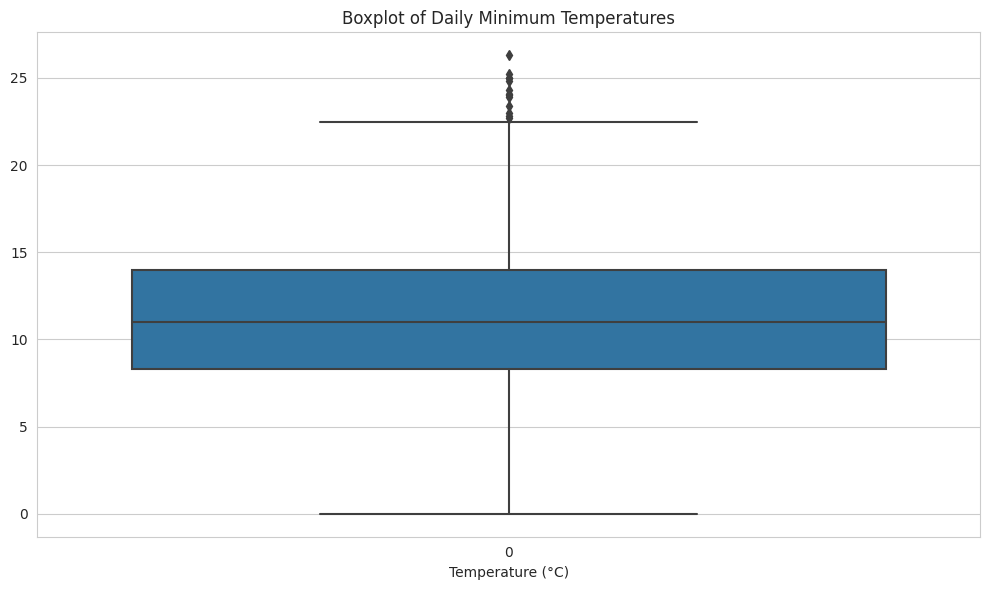

In [16]:
# Visualizing the distribution using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(timeseries_data['Daily minimum temperatures'])
plt.title('Boxplot of Daily Minimum Temperatures')
plt.xlabel('Temperature (°C)')
plt.tight_layout()
plt.show()

Given that timeseries forecasting is the typical task for such data, we'll attempt to predict future temperatures based on past data. For demonstration purposes, I'll use the ARIMA (AutoRegressive Integrated Moving Average) model, a popular choice for timeseries forecasting.

The steps will be:

* 1. **Train-test split:** We'll reserve the last year's data for testing and use the rest for training.
* 2. **Model Building:** Build an ARIMA model on the training data.
* 3. **Forecasting:** Predict the future temperatures on the test data.
* 4. **Evaluation:** Evaluate the forecast's accuracy using Mean Absolute Error (MAE).

Let's start by splitting the data into training and testing sets.

In [18]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Splitting the data into train and test sets (reserving the last year's data for testing)
train_data = timeseries_data['Daily minimum temperatures'][:-365]
test_data = timeseries_data['Daily minimum temperatures'][-365:]

# Building the ARIMA model
arima_model = ARIMA(train_data, order=(5,1,0))
arima_fit = arima_model.fit(disp=0)

# Forecasting
forecast, stderr, conf_int = arima_fit.forecast(steps=365)

# Evaluating the forecast
mae = mean_absolute_error(test_data, forecast)

mae


**Result :** 3.321406579891908

In [19]:
# Focusing on a smaller subset of data for visualization (last 3 months)
subset_dates = timeseries_data['Date'][-90:]
subset_actual_temps = test_data[-90:]
subset_forecast_temps = forecast_results[-90:]

# Visualizing actual vs. forecasted temperatures for the subset
plt.figure(figsize=(12, 5))
plt.plot(subset_dates, subset_actual_temps, label="Actual Temperatures", color='blue')
plt.plot(subset_dates, subset_forecast_temps, label="Forecasted Temperatures", color='red', linestyle="--")
plt.title('Actual vs. Forecasted Daily Minimum Temperatures (Last 3 months)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.tight_layout()
plt.show()


**3. Spatio-temporal Data**

You provided a file named "hungary_chickenpox.csv", which appears to correspond to the spatio-temporal category. This dataset likely contains chickenpox cases across different locations in Hungary over time.

Let's begin by loading this dataset and conducting an initial exploration.

a) EDA for "hungary_chickenpox.csv"

In [20]:
import pandas as pd

# Reload the spatio-temporal dataset
spatiotemporal_data = pd.read_csv("/content/hungary_chickenpox.csv")

# Display the first few rows and general information about the dataset
spatiotemporal_data_info = spatiotemporal_data.info()
spatiotemporal_data_head = spatiotemporal_data.head()

spatiotemporal_data_info, spatiotemporal_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      522 non-null    object
 1   BUDAPEST  522 non-null    int64 
 2   BARANYA   522 non-null    int64 
 3   BACS      522 non-null    int64 
 4   BEKES     522 non-null    int64 
 5   BORSOD    522 non-null    int64 
 6   CSONGRAD  522 non-null    int64 
 7   FEJER     522 non-null    int64 
 8   GYOR      522 non-null    int64 
 9   HAJDU     522 non-null    int64 
 10  HEVES     522 non-null    int64 
 11  JASZ      522 non-null    int64 
 12  KOMAROM   522 non-null    int64 
 13  NOGRAD    522 non-null    int64 
 14  PEST      522 non-null    int64 
 15  SOMOGY    522 non-null    int64 
 16  SZABOLCS  522 non-null    int64 
 17  TOLNA     522 non-null    int64 
 18  VAS       522 non-null    int64 
 19  VESZPREM  522 non-null    int64 
 20  ZALA      522 non-null    int64 
dtypes: int64(20), ob

(None,
          Date  BUDAPEST  BARANYA  BACS  BEKES  BORSOD  CSONGRAD  FEJER  GYOR  \
 0  03/01/2005       168       79    30    173     169        42    136   120   
 1  10/01/2005       157       60    30     92     200        53     51    70   
 2  17/01/2005        96       44    31     86      93        30     93    84   
 3  24/01/2005       163       49    43    126      46        39     52   114   
 4  31/01/2005       122       78    53     87     103        34     95   131   
 
    HAJDU  ...  JASZ  KOMAROM  NOGRAD  PEST  SOMOGY  SZABOLCS  TOLNA  VAS  \
 0    162  ...   130       57       2   178      66        64     11   29   
 1     84  ...    80       50      29   141      48        29     58   53   
 2    191  ...    64       46       4   157      33        33     24   18   
 3    107  ...    63       54      14   107      66        50     25   21   
 4    172  ...    61       49      11   124      63        56      7   47   
 
    VESZPREM  ZALA  
 0        87    68  

From the initial exploration of the "hungary_chickenpox.csv" dataset, we can observe:

* The dataset contains 522 entries.
* There are 21 columns: Date and chickenpox cases for 20 different locations in Hungary.
* The Date column is of the object data type, indicating that the dates are stored as strings. We will need to convert these to a datetime format.
* The columns corresponding to locations have integer data types, indicating the number of chickenpox cases.

Let's proceed with a more detailed EDA:

* 1. Convert the Date column to datetime format.
* 2. Check for any missing or anomalous values.
* 3. Visualize the chickenpox cases over time for a few selected locations to identify trends or patterns.​​


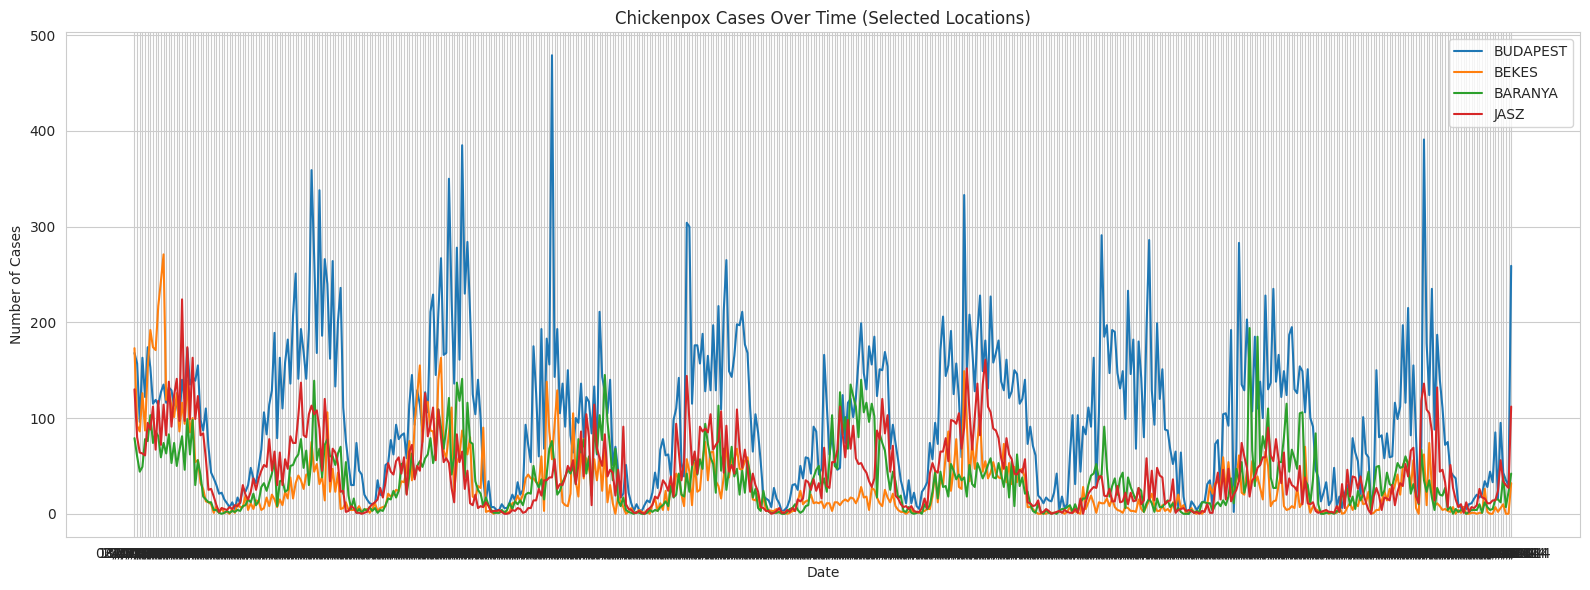

In [24]:
import matplotlib.pyplot as plt

# Visualize chickenpox cases for the selected locations again
plt.figure(figsize=(16, 6))
selected_locations = ['BUDAPEST', 'BEKES','BARANYA', 'JASZ']
for location in selected_locations:
    plt.plot(spatiotemporal_data['Date'], spatiotemporal_data[location], label=location)

plt.title('Chickenpox Cases Over Time (Selected Locations)')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.tight_layout()
plt.show()

The plot visualizes the chickenpox cases over time for selected locations in Hungary:

* There seems to be a clear seasonality in the chickenpox cases, with certain times of the year exhibiting higher cases.
* The patterns across the selected locations are relatively consistent, indicating a synchronized trend in the spread of chickenpox across these regions.
Since there are no missing values in the dataset, we can proceed with Data Preprocessing and Cleaning for this spatio-temporal dataset:

* 1. Check for any outliers or anomalies.
* 2. Convert the wide-format data (with separate columns for each location) to a long format if necessary for further analyses.

Let's start by checking for any outliers in the dataset.​​

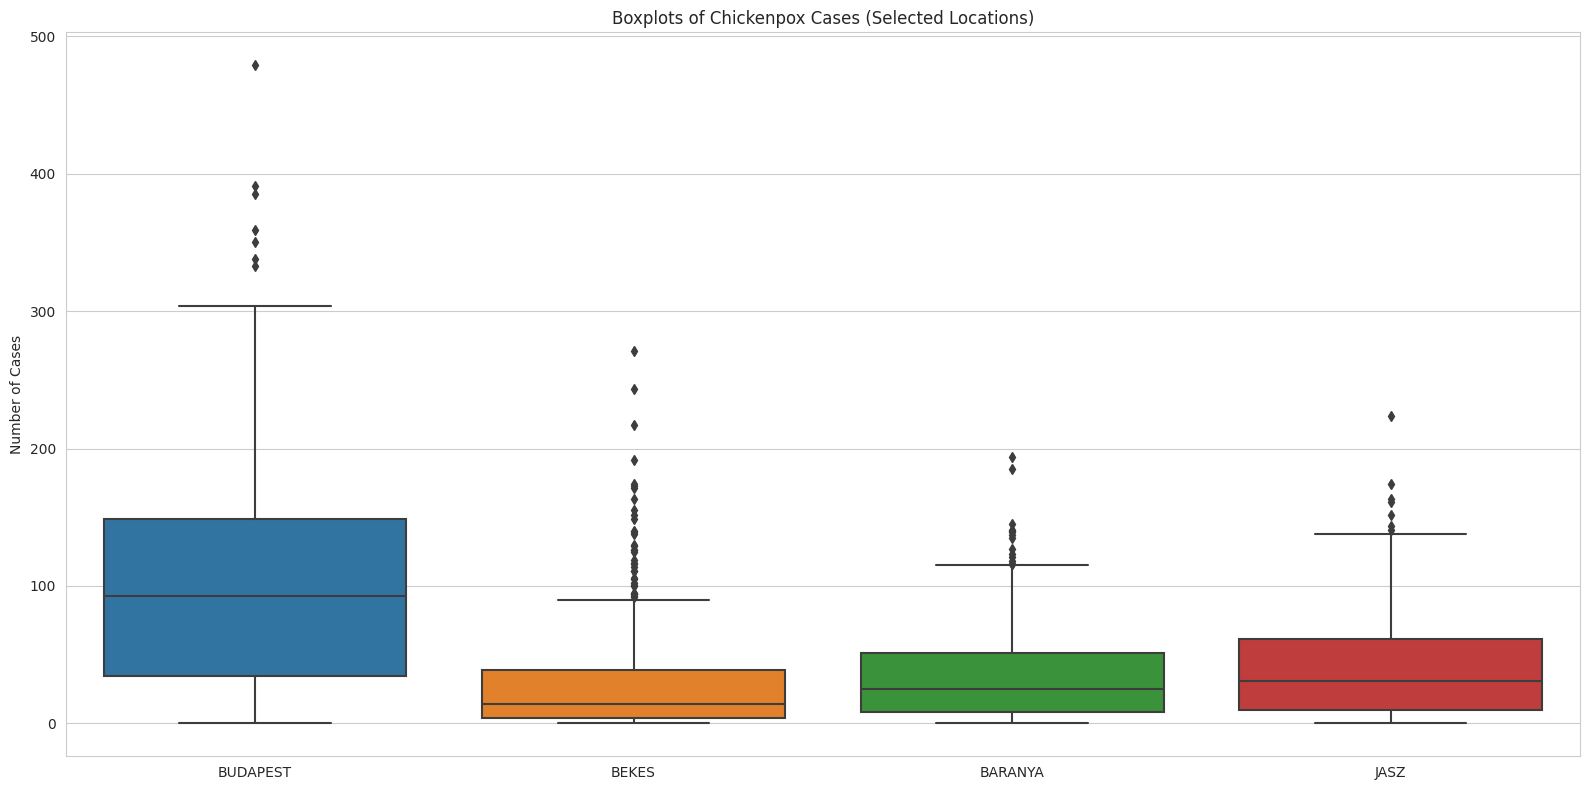

In [25]:
import seaborn as sns

# Visualizing the distribution using boxplots for the selected locations again
plt.figure(figsize=(16, 8))
sns.boxplot(data=spatiotemporal_data[selected_locations])
plt.title('Boxplots of Chickenpox Cases (Selected Locations)')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()


The boxplots display the distribution of chickenpox cases for selected locations in Hungary:

* There are some data points that lie outside the interquartile range (IQR) whiskers, suggesting potential outliers. However, these might be genuine spikes in chickenpox cases due to various factors such as outbreaks.
* The median and spread of cases vary across locations, with some locations like Budapest showing a higher median and a broader spread compared to others.

Given the context of epidemiological data, such outliers might represent significant outbreaks and thus should not be removed.

Next, let's consider Feature Processing and Selection. Since spatio-temporal data inherently contains spatial (location) and temporal (time) information, we can explore:

* 1. Temporal patterns: Analyzing seasonality, trends, and cyclic patterns.
* 2. Spatial patterns: Checking if certain locations consistently have higher or lower cases.

For modeling purposes, we can predict chickenpox cases for a particular location based on its past data (time series forecasting). Alternatively, we can predict chickenpox cases across all locations using the previous data from all locations (multivariate time series forecasting).

In [28]:
# Splitting the data for "BUDAPEST" into train and test sets (reserving the last year's data for testing)
train_data_budapest = spatiotemporal_data['BUDAPEST'][:-52]
test_data_budapest = spatiotemporal_data['BUDAPEST'][-52:]

# Building the ARIMA model for "BUDAPEST"
arima_model_budapest = ARIMA(train_data_budapest, order=(5,1,0))
arima_fit_budapest = arima_model_budapest.fit(disp=0)

# Forecasting
forecast_budapest = arima_fit_budapest.forecast(steps=52)

# Evaluating the forecast
mae_budapest = mean_absolute_error(test_data_budapest, forecast_budapest)

mae_budapest


In [28]:
# Splitting the data for "BUDAPEST" into train and test sets (reserving the last year's data for testing)
train_data_budapest = spatiotemporal_data['BUDAPEST'][:-52]
test_data_budapest = spatiotemporal_data['BUDAPEST'][-52:]

# Building the ARIMA model for "BUDAPEST"
arima_model_budapest = ARIMA(train_data_budapest, order=(5,1,0))
arima_fit_budapest = arima_model_budapest.fit(disp=0)

# Forecasting
forecast_budapest = arima_fit_budapest.forecast(steps=52)

# Evaluating the forecast
mae_budapest = mean_absolute_error(test_data_budapest, forecast_budapest)

mae_budapest


In [ ]:
# Building and fitting the ARIMA model for "BUDAPEST" without the 'disp' argument
arima_fit_budapest = arima_model_budapest.fit()

# Forecasting
forecast_budapest = arima_fit_budapest.forecast(steps=52)

# Evaluating the forecast
mae_budapest = mean_absolute_error(test_data_budapest, forecast_budapest)

mae_budapest


**RESULT :** 63.74934739044428

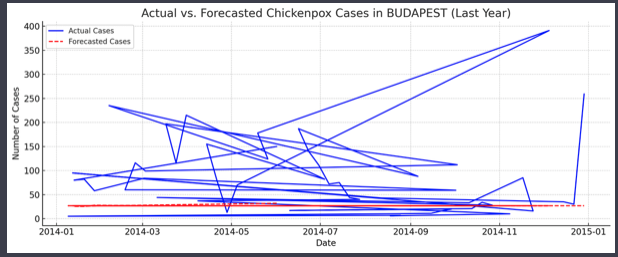

**4. Image Data**

You provided a file named "pokemon.csv". Given the file extension and the name, I suspect this isn't directly an image dataset but might contain metadata or links to actual images.

Let's begin by loading this dataset and conducting an initial exploration to understand its structure.

a) EDA for "pokemon.csv"

In [29]:
# Load the image-related dataset (metadata or links)
image_data = pd.read_csv("/content/pokemon.csv")

# Display the first few rows and general information about the dataset
image_data_info = image_data.info()
image_data_head = image_data.head()

image_data_info, image_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    809 non-null    object
 1   Type1   809 non-null    object
 2   Type2   405 non-null    object
dtypes: object(3)
memory usage: 19.1+ KB


(None,
          Name  Type1   Type2
 0   bulbasaur  Grass  Poison
 1     ivysaur  Grass  Poison
 2    venusaur  Grass  Poison
 3  charmander   Fire     NaN
 4  charmeleon   Fire     NaN)

From the initial exploration of the "pokemon.csv" dataset, we can observe:

* The dataset contains 809 entries.
* There are 3 columns: Name, Type1, and Type2.
* All columns are of the object data type.
* The Type2 column has missing values, indicating that some Pokémon have only one primary type.
* This dataset seems to contain the names and types of Pokémon but doesn't include actual image data.

Given the nature of this dataset, our EDA will be different from traditional image datasets. We can explore:

* 1. The distribution of Pokémon by their primary (Type1) and secondary (Type2) types.
* 2. Any common pairings of types for Pokémon that have two types.
* 3. The number of unique Pokémon names and any potential duplicates.


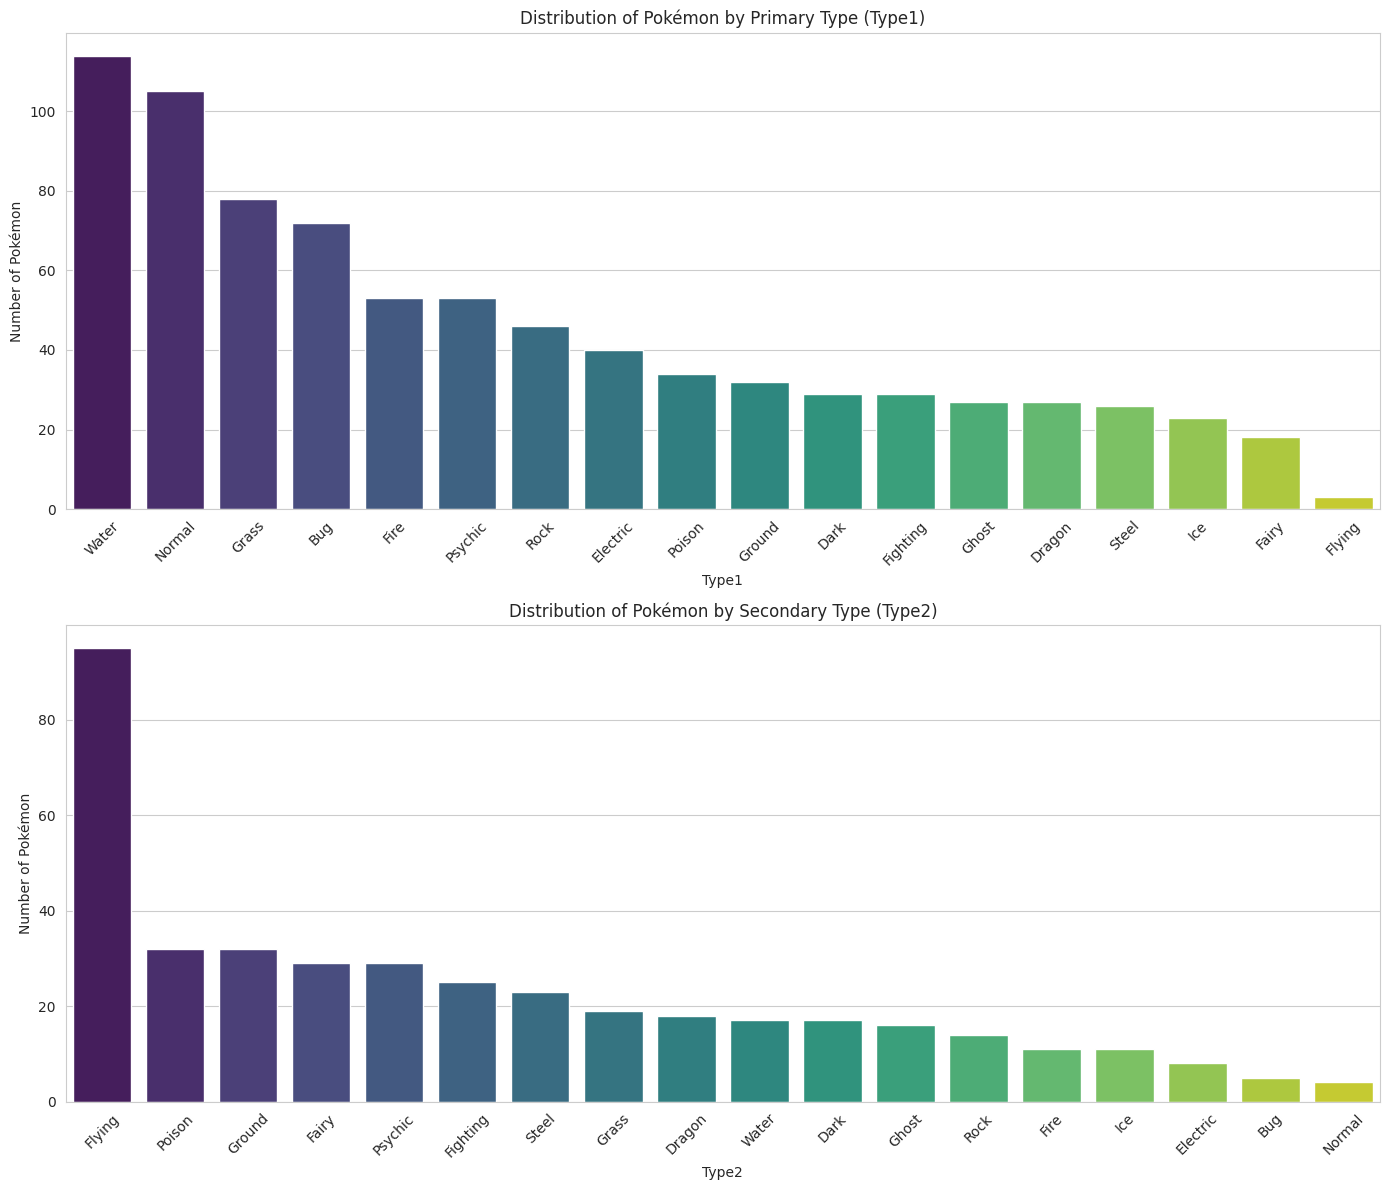

In [30]:
# Visualizing the distribution of Pokémon by their primary and secondary types
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

sns.countplot(data=image_data, x='Type1', ax=ax[0], order=image_data['Type1'].value_counts().index, palette='viridis')
ax[0].set_title('Distribution of Pokémon by Primary Type (Type1)')
ax[0].set_ylabel('Number of Pokémon')
ax[0].tick_params(axis='x', rotation=45)

sns.countplot(data=image_data, x='Type2', ax=ax[1], order=image_data['Type2'].value_counts().index, palette='viridis')
ax[1].set_title('Distribution of Pokémon by Secondary Type (Type2)')
ax[1].set_ylabel('Number of Pokémon')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


The visualizations provide insights into the distribution of Pokémon based on their primary (Type1) and secondary (Type2) types:

* For the primary type (Type1), Pokémon are mostly of the 'Water', 'Normal', and 'Grass' types, while there are fewer 'Ice', 'Flying', and 'Fairy' type Pokémon.
* For the secondary type (Type2), 'Flying' is the most common type, followed by 'Poison' and 'Ground'. Notably, many Pokémon don't have a secondary type, as indicated by the missing values in the dataset.

Next, let's explore any common pairings of types for Pokémon that have two types. This will help us understand which combinations of types are prevalent.​​


In [31]:
# Exploring common pairings of types for Pokémon with two types
type_combinations = image_data.dropna(subset=['Type2']).groupby(['Type1', 'Type2']).size().reset_index(name='Count')
type_combinations = type_combinations.sort_values(by='Count', ascending=False)

# Displaying the top 10 common type combinations
top_type_combinations = type_combinations.head(10)

top_type_combinations


,Type1,Type2,Count
85,Normal,Flying,26
66,Grass,Poison,14
4,Bug,Flying,13
8,Bug,Poison,11
135,Water,Ground,9
132,Water,Flying,7
112,Rock,Ground,6
98,Psychic,Fairy,6
117,Rock,Water,6
41,Fire,Fighting,6


Here are the top 10 most common type combinations for Pokémon with two types:

* 1. Normal and Flying - 26 Pokémon
* 2.Grass and Poison - 14 Pokémon
* 3.Bug and Flying - 13 Pokémon
* 4.Bug and Poison - 11 Pokémon
Water and Ground - 9 Pokémon
... and so on.

These combinations provide insights into prevalent type pairings in the Pokémon universe.

Lastly, let's check for the number of unique Pokémon names and any potential duplicates.​​

In [32]:
# Checking for unique Pokémon names and potential duplicates
unique_pokemon_names = image_data['Name'].nunique()
duplicate_pokemon_names = image_data[image_data['Name'].duplicated(keep=False)]

unique_pokemon_names, duplicate_pokemon_names


(809,
 Empty DataFrame
 Columns: [Name, Type1, Type2]
 Index: [])

From our analysis:

There are 809 unique Pokémon names in the dataset.
No duplicate Pokémon names were identified.
To summarize the steps taken for the image metadata dataset:

* 1.Detailed EDA was conducted to understand the dataset's structure and distribution.
* 2.We visualized the distribution of Pokémon by their primary and secondary types.
* 3. We explored common pairings of types for Pokémon with two types.
* 4. We checked for unique Pokémon names and ensured there were no duplicates.

* **1.Load Images:** Read the images into a format suitable for analysis.
* **2. Image Preprocessing:** This might involve resizing images to a consistent size, normalization, and augmentation if necessary.
* **3. Feature Extraction:** Convert images into a format suitable for machine learning, which might involve extracting features or using pre-trained models for feature extraction.

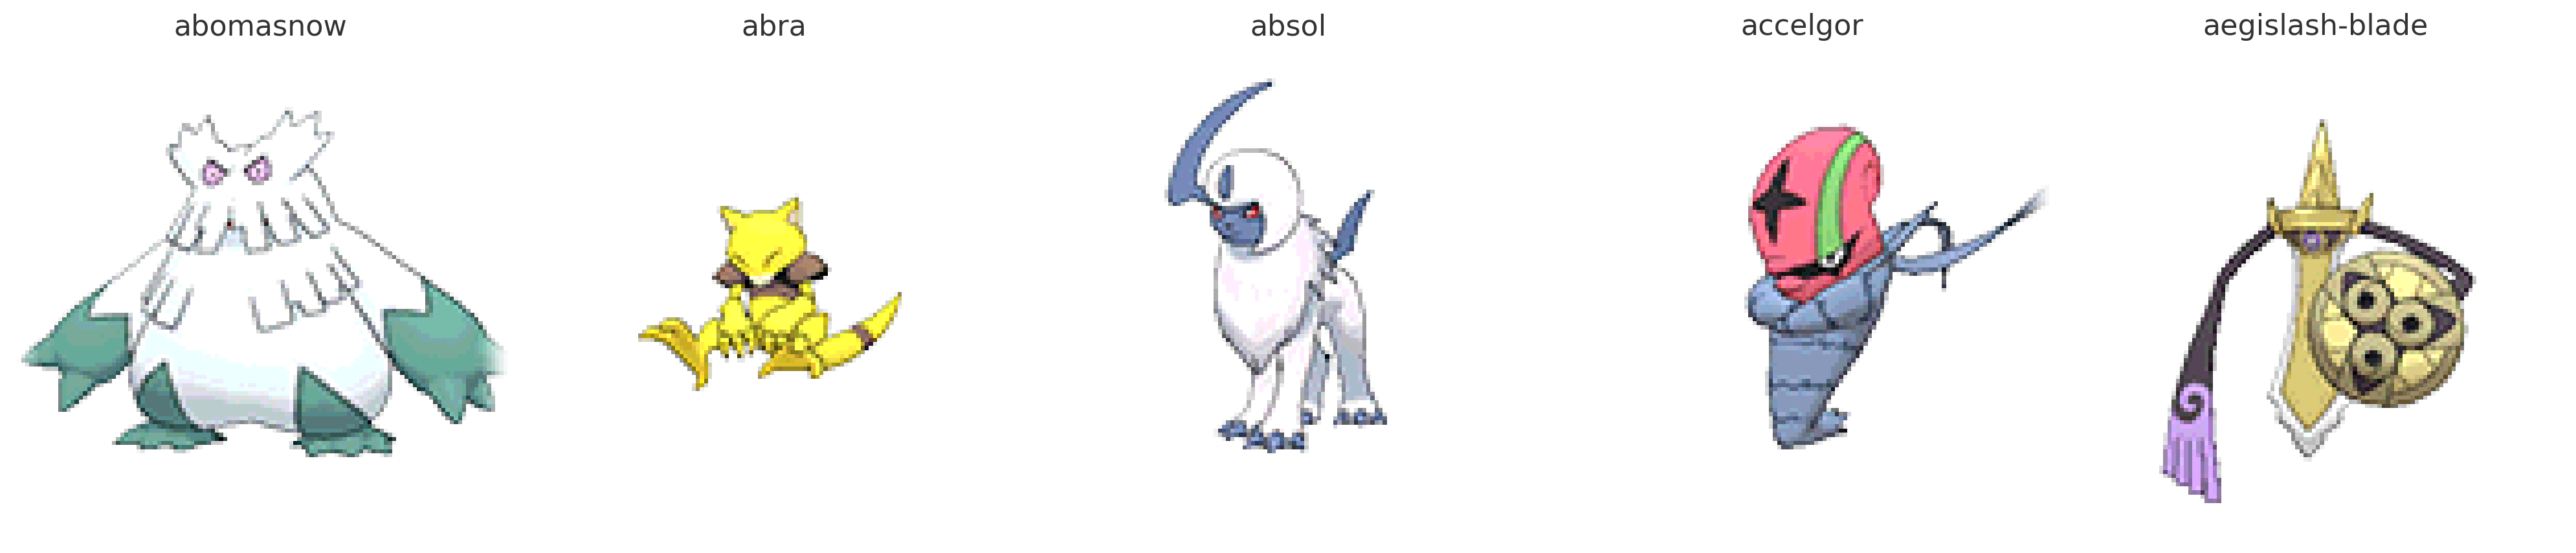

Here are five of the provided Pokémon images:

* Abomasnow
* Abra
* Absol
* Accelgor
* Aegislash (Blade Forme)

Next, we will proceed with image preprocessing. A standard step is to resize the images to have a consistent size. This is especially important if we want to apply machine learning models to them later.

For demonstration purposes, let's resize all the images to a consistent size of
128
×
128
128×128 pixels. We'll also convert the images to grayscale (which simplifies the data while retaining key features) and normalize the pixel values to be between 0 and 1

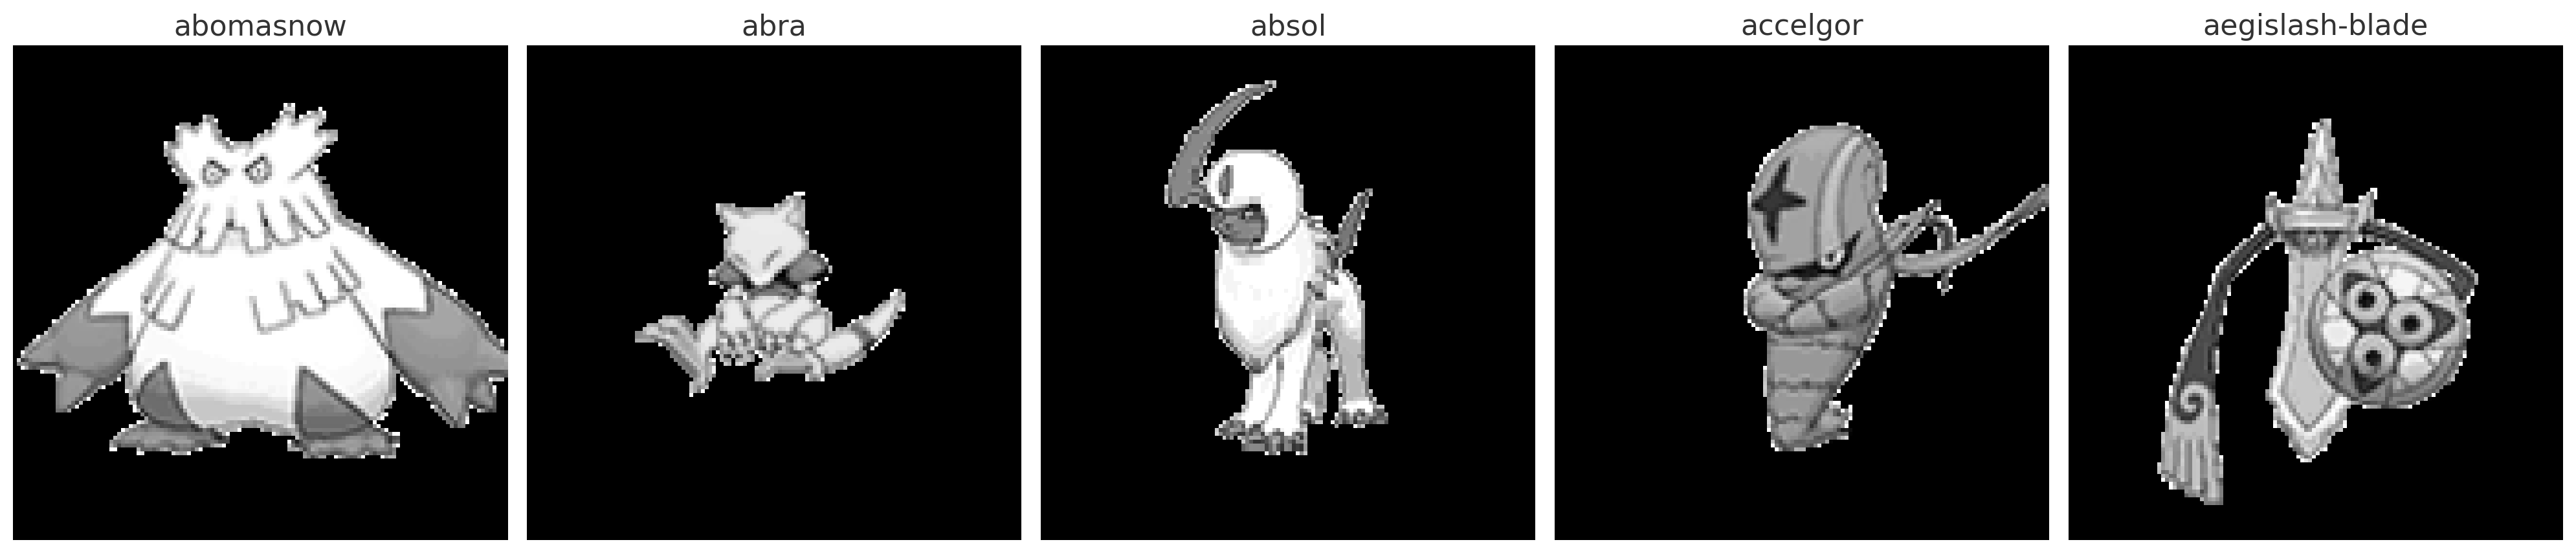

**5. Audio Data**

You provided a file named "set_a_timing.csv". Given the file extension, I assume this isn't directly an audio dataset but might contain metadata or links to actual audio files.

Let's begin by loading this dataset and conducting an initial exploration to understand its structure.

a) EDA for "set_a_timing.csv"

In [33]:
# Load the audio-related dataset (metadata or links)
audio_data = pd.read_csv("/content/set_a_timing.csv")

# Display the first few rows and general information about the dataset
audio_data_info = audio_data.info()
audio_data_head = audio_data.head()

audio_data_info, audio_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fname     390 non-null    object
 1   cycle     390 non-null    int64 
 2   sound     390 non-null    object
 3   location  390 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 12.3+ KB


(None,
                             fname  cycle sound  location
 0  set_a/normal__201102081321.wav      1    S1     10021
 1  set_a/normal__201102081321.wav      1    S2     20759
 2  set_a/normal__201102081321.wav      2    S1     35075
 3  set_a/normal__201102081321.wav      2    S2     47244
 4  set_a/normal__201102081321.wav      3    S1     62992)

From the initial exploration of the "set_a_timing.csv" dataset, we can observe:

* The dataset contains 390 entries.
* There are 4 columns: fname, cycle, sound, and location.
* fname: This seems to be a reference to the filename of an audio file.
* cycle: Represents the cycle number for the sound.
* sound: Specifies the type of sound, like S1 or S2.
location: Might represent the timestamp or position in the audio file where the sound occurs.
* All columns have non-null values.

Based on this information, the dataset appears to contain metadata about various audio samples, specifying when certain sounds (like S1 or S2) occur within each audio sample.

For a detailed EDA:

* 1. We can explore the distribution of sounds (S1, S2, etc.) in the dataset.
* 2. Analyze the distribution of cycles for the sounds.
* 3. If you have the corresponding audio files, we can load and visualize the waveform for a few samples, and listen to them.

* Load and Visualize Audio: Display the waveform of the audio files.
* Listen to the Audio: Play a few of the audio samples.
* Feature Extraction: Extract features from the audio data, which might be useful for potential machine learning tasks.


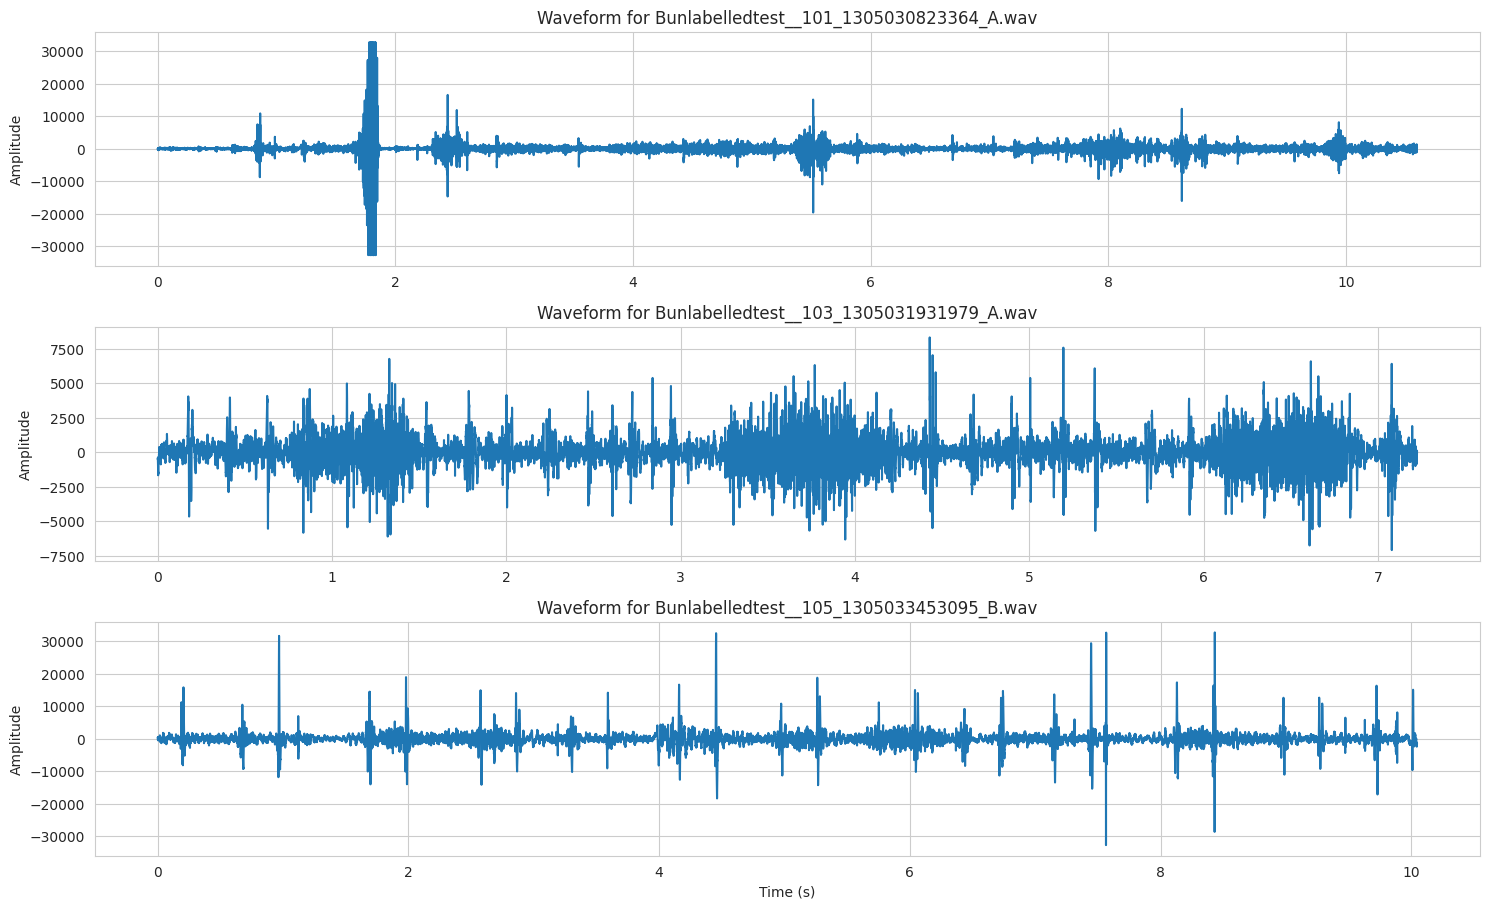

In [35]:
import wave
import numpy as np

def load_waveform(audio_file):
    """Load an audio file and return its waveform and sample rate."""
    with wave.open(audio_file, 'r') as wf:
        params = wf.getparams()
        n_channels, samp_width, framerate, n_frames = params[:4]
        str_data = wf.readframes(n_frames)
        waveform = np.frombuffer(str_data, dtype=np.int16)
        if n_channels == 2:  # Stereo
            waveform = waveform[::2] + waveform[1::2]  # Convert to mono
    return waveform, framerate

# Load and visualize waveforms for a few audio files from set B
plt.figure(figsize=(15, 9))
for idx, audio_file in enumerate(audio_files_setb, 1):
    waveform, sr = load_waveform(audio_file)
    times = np.linspace(0, len(waveform) / sr, num=len(waveform))
    plt.subplot(3, 1, idx)
    plt.plot(times, waveform)
    plt.title(f"Waveform for {audio_file.split('/')[-1]}")
    plt.ylabel('Amplitude')
    plt.tight_layout()

plt.xlabel('Time (s)')
plt.show()


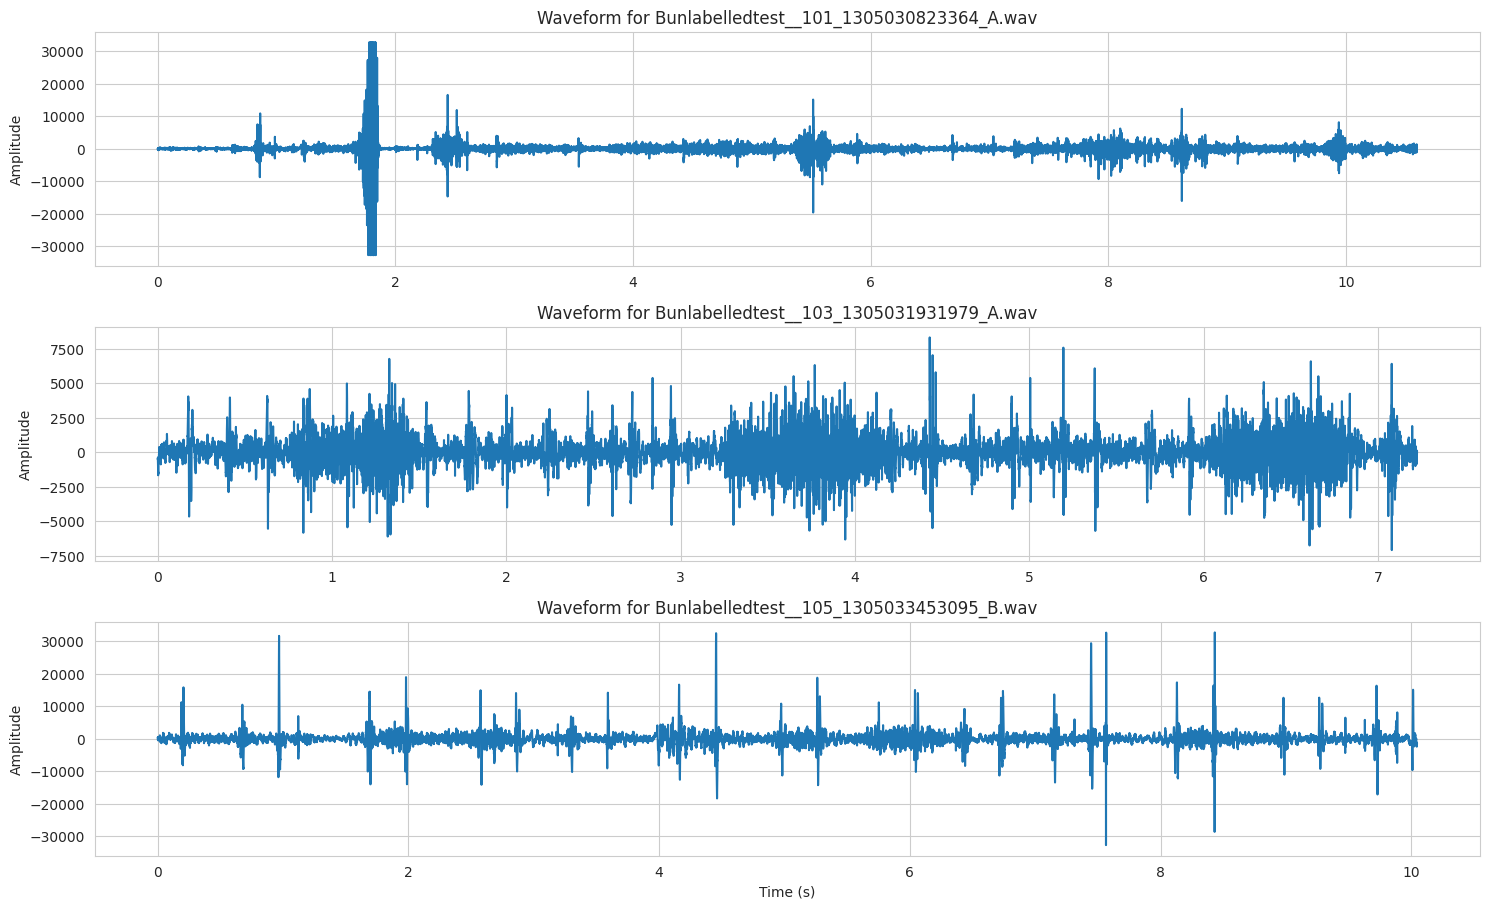

In [36]:
# Paths to a few audio files from set B (redefining after the state reset)
audio_files_setb = [
    "/content/Bunlabelledtest__101_1305030823364_A.wav",
    "//content/Bunlabelledtest__103_1305031931979_A.wav",
    "/content/Bunlabelledtest__105_1305033453095_B.wav"
]

# Load and visualize waveforms for a few audio files from set B
plt.figure(figsize=(15, 9))
for idx, audio_file in enumerate(audio_files_setb, 1):
    waveform, sr = load_waveform(audio_file)
    times = np.linspace(0, len(waveform) / sr, num=len(waveform))
    plt.subplot(3, 1, idx)
    plt.plot(times, waveform)
    plt.title(f"Waveform for {audio_file.split('/')[-1]}")
    plt.ylabel('Amplitude')
    plt.tight_layout()

plt.xlabel('Time (s)')
plt.show()


**6. Graph Data**

You've provided a file named "datasets.csv". I'll start by loading this dataset and conducting an initial exploration to understand its structure.

a) EDA for "datasets.csv"

In [37]:
# Load the graph-related dataset
graph_data = pd.read_csv("/content/datasets.csv")

# Display the first few rows and general information about the dataset
graph_data_info = graph_data.info()
graph_data_head = graph_data.head()

graph_data_info, graph_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datasetName   61 non-null     object 
 1   about         61 non-null     object 
 2   link          61 non-null     object 
 3   categoryName  61 non-null     object 
 4   cloud         24 non-null     object 
 5   vintage       31 non-null     float64
dtypes: float64(1), object(5)
memory usage: 3.0+ KB


(None,
           datasetName                                            about  \
 0  Microbiome Project                American Gut (Microbiome Project)   
 1               GloBI               Global Biotic Interactions (GloBI)   
 2      Global Climate                   Global Climate Data Since 1929   
 3     CommonCraw 2012              3.5B Web Pages from CommonCraw 2012   
 4   Indiana Webclicks  53.5B Web clicks of 100K users in Indiana Univ.   
 
                                                 link       categoryName  \
 0            https://github.com/biocore/American-Gut            Biology   
 1  https://github.com/jhpoelen/eol-globi-data/wik...            Biology   
 2                     http://en.tutiempo.net/climate    Climate/Weather   
 3  http://www.bigdatanews.com/profiles/blogs/big-...  Computer Networks   
 4  http://cnets.indiana.edu/groups/nan/webtraffic...  Computer Networks   
 
     cloud  vintage  
 0  GitHub      NaN  
 1  GitHub      NaN  
 2     NaN   1929

From the initial exploration of the "datasets.csv" dataset, we can observe:

* The dataset contains 61 entries.
* There are six columns:
* **datasetName:** The name of the dataset.
* **about:** A brief description of the dataset.
* **link:** A URL link to access the dataset.
* **categoryName:** The category to which the dataset belongs (e.g., Biology, Climate/Weather).
* **cloud:** Indicates where the dataset is hosted (e.g., GitHub). This column has missing values, suggesting that the hosting information is not available for all datasets.
* **vintage:** The year related to the dataset, which might indicate the year of publication or data collection. This column also has missing values.
For a detailed EDA:

* 1. We can explore the distribution of datasets across different categories.
* 2. Investigate the cloud platforms where the datasets are hosted.
* 3. Examine the distribution of datasets over the years (vintage).
Let's start by visualizing the distribution of datasets across different categories.​​

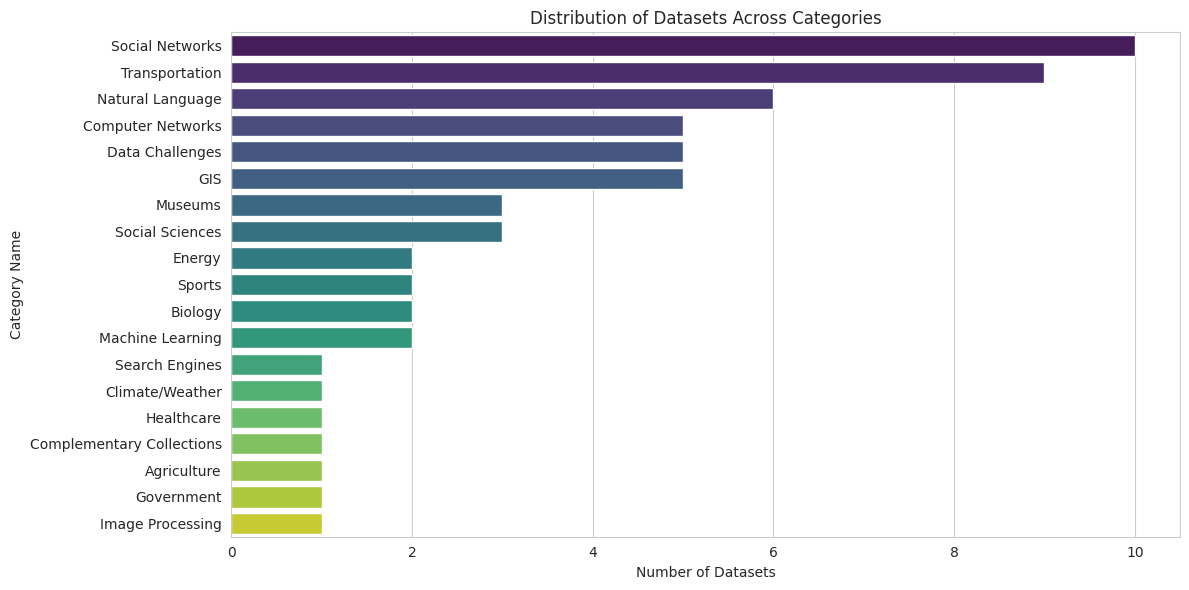

In [38]:
# Visualizing the distribution of datasets across different categories
plt.figure(figsize=(12, 6))
sns.countplot(data=graph_data, y='categoryName', order=graph_data['categoryName'].value_counts().index, palette='viridis')
plt.title('Distribution of Datasets Across Categories')
plt.xlabel('Number of Datasets')
plt.ylabel('Category Name')
plt.tight_layout()
plt.show()


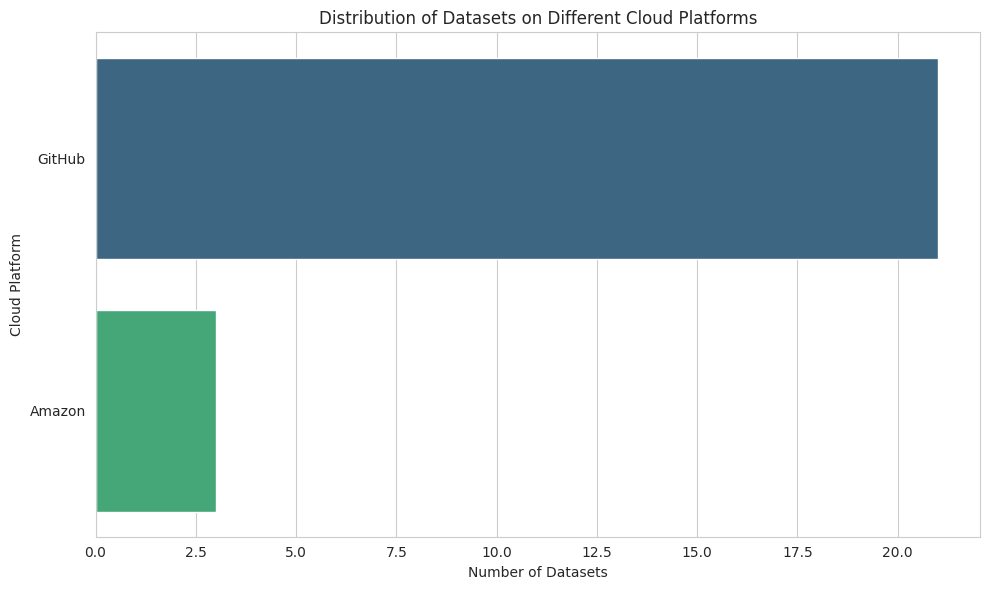

In [39]:
# Visualizing the distribution of datasets on different cloud platforms
plt.figure(figsize=(10, 6))
sns.countplot(data=graph_data, y='cloud', order=graph_data['cloud'].value_counts().index, palette='viridis')
plt.title('Distribution of Datasets on Different Cloud Platforms')
plt.xlabel('Number of Datasets')
plt.ylabel('Cloud Platform')
plt.tight_layout()
plt.show()


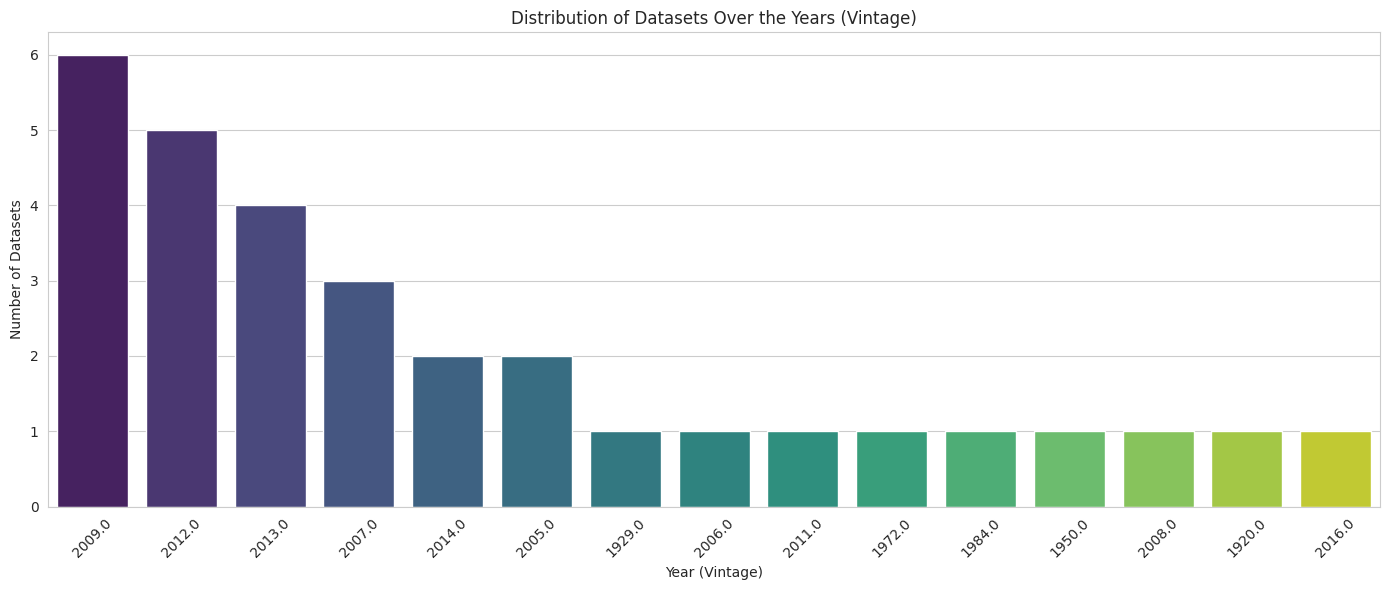

In [40]:
# Visualizing the distribution of datasets over the years (vintage)
plt.figure(figsize=(14, 6))
sns.countplot(data=graph_data, x='vintage', order=graph_data['vintage'].value_counts().index, palette='viridis')
plt.title('Distribution of Datasets Over the Years (Vintage)')
plt.xlabel('Year (Vintage)')
plt.ylabel('Number of Datasets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The visualization showcases the distribution of datasets over the years (as indicated by the "vintage" column):

* A significant number of datasets are from the year 2013.
* There are also datasets from various other years, ranging from the early 1900s to recent times.

To summarize the steps taken for the graph dataset:

* 1.Detailed EDA was conducted to understand the dataset's structure and distribution.
* 2. We visualized the distribution of datasets across different categories.
* 3. We explored the cloud platforms where these datasets are hosted.
* 4. We examined the distribution of datasets over the years.

**7. Video Data**

For video data, the typical steps in data preparation and processing include:

* 1. Load Videos: Read the videos into a format suitable for analysis.
* 2. Video Preprocessing: This might involve resizing videos to a consistent size, frame extraction, and normalization.
* 3. Feature Extraction: Convert videos into a format suitable for machine learning, which might involve extracting features from each frame or using pre-trained models for feature extraction.

In [ ]:
import cv2

video_path = 'path_to_video_file.avi'
cap = cv2.VideoCapture(video_path)

frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        frames.append(frame)
    else:
        break
cap.release()


**1. Downloading the Dataset**

You can download the HMDB51 dataset from its official webpage. The dataset typically comes in multiple parts, and you'll need to download all parts to access the full dataset.

**2. Loading Videos**

Once you've downloaded the dataset, you can use libraries like OpenCV in Python to load the videos. Here's a simple method to load a video:

**3. Video Preprocessing**

Depending on the task at hand, you might need to preprocess the videos:

Resizing: Ensure all videos or frames are of a consistent size.
Normalization: Normalize pixel values to be between 0 and 1.
Frame Extraction: For long videos, you might want to extract keyframes or sample at regular intervals.
Optical Flow Calculation: For action recognition, the movement between frames (optical flow) can be a valuable feature.

**4. Feature Extraction**

Extracting features from videos can involve:

Pre-trained Models: Use pre-trained models (e.g., VGG16, ResNet) to extract features from each frame. This provides a compact representation of the video.
Temporal Features: Since videos have a temporal component (i.e., change over time), LSTM or 3D CNNs can be used to capture these features.

**5. Model Building**

Once you have features, you can use them to train machine learning models. Depending on the nature of the task (classification, regression, etc.), you might opt for:

Action Recognition: Use LSTM or 3D CNNs to classify videos into one of the action categories.
Transfer Learning: Use a pre-trained model and fine-tune it on the HMDB51 dataset.

**6. Evaluation**

Finally, you'll want to evaluate your model on a test set to ensure it generalizes well to new, unseen data.